In [56]:
import textblob
import pandas as pd
import numpy as np
from textblob_de import TextBlobDE
import matplotlib.pyplot as plt
# %matplotlib inline

In [57]:
df = pd.read_csv("kbClean.csv")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3304 non-null   int64  
 1   NameKlinik         3304 non-null   object 
 2   Erfahrungsbericht  3304 non-null   object 
 3   Gesamt             3304 non-null   float64
 4   QualBeratung       3304 non-null   float64
 5   MedBehandlung      3304 non-null   float64
 6   VerwalAblaeufe     3304 non-null   float64
 7   Zufriedenheit      3304 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 206.6+ KB


In [59]:
### Checking for the Distribution of Default ###
print(round(df.groupby('NameKlinik').Zufriedenheit.value_counts(normalize=True)*100,2))
#ax = round(df.groupby('NameKlinik').Zufriedenheit.value_counts(normalize=True)*100,2)
#type(ax)

NameKlinik                                           Zufriedenheit
AMEOS Klinikum Hildesheim                            neg              77.19
                                                     pos              22.81
AMEOS Klinikum Seepark Geestland                     pos              60.42
                                                     neg              39.58
Agaplesion - Diakonieklinikum Rotenburg              neg              52.86
                                                     pos              47.14
DIAKOVERE Henriettenstift                            neg              52.28
                                                     pos              47.72
Diana Klinik-Fachklinik für Physikalische Medizin    neg              51.53
                                                     pos              48.47
Eilenriede Klinik Hannover                           pos              77.55
                                                     neg              22.45
Elbe Kliniken Stade -

In [60]:
#ax = df.plot.bar(rot=0)

In [61]:
new_df = df.groupby('NameKlinik').Zufriedenheit.value_counts(normalize=True)

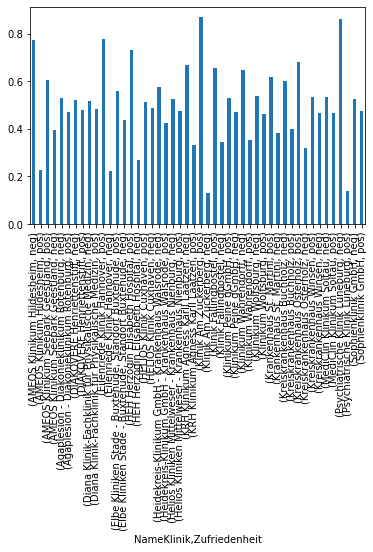

In [62]:
ax = new_df.plot.bar(stacked=0)

In [63]:
df = df.sample(frac=1)

In [64]:
df.head()

,Unnamed: 0,NameKlinik,Erfahrungsbericht,Gesamt,QualBeratung,MedBehandlung,VerwalAblaeufe,Zufriedenheit
250,255,Klinikum Wolfsburg,Bei meinem Sohn wurde ambulant eine Circumcisi...,1.0,1.0,2.3,2.3,neg
2427,2469,Klinik Fallingbostel,Mit der Klinik war ich zu 100 % zufrieden! Die...,5.0,5.0,5.0,5.0,pos
2765,2810,MediClin Klinikum Soltau,Ich bin leider nicht so überzeugt von dieser K...,2.3,1.0,5.0,5.0,neg
1658,1682,AMEOS Klinikum Seepark Geestland,Ich war Patient. wurde nach einem Unfall einge...,1.0,1.0,2.3,1.0,neg
1273,1292,AMEOS Klinikum Hildesheim,Wollte nach kurzer Beratung auf keinen Fall me...,1.0,1.0,1.0,1.0,neg


In [80]:
from sklearn.model_selection import train_test_split

Independent_var = df.Erfahrungsbericht
Dependent_var = df.Zufriedenheit

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.15, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 2808
IV_test  : 496
DV_train : 2808
DV_test  : 496


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [82]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[215,  18],
       [ 46, 217]])

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.7253902516725071
Precision :  0.8349011082337221
Recall :  0.7253902516725071


In [71]:
#example = ["Augenscheinlich braucht diese Klinik in Corona-Zeiten Geld und tut alles, um dieses von den Krankenkassen zu bekommen!Patientin war meine 3 Monate alte Tochter. Es handelte sich um eine geplante Operation, die durchaus auch als ambulante OP vorgenommen wird. Den Grund, warum die stationäre Aufnahme notwendig war, konnte mir niemand erläutern!Bei der vorstationären Aufnahme wurde ich daraufhingewiesen, dass ich Windeln und Nahrung für mein Kind selbst mitzubringen hätte. Das Nahrung mitzubringen ist, konnte ich nachvollziehen, da es hier sehr viele verschiedene Angebote gibt und die Klinik unmöglich alle Sorten vorhalten kann! Aber Windeln? Das ist für eine Klinik mit Kinderorthopädie als Fachrichtung nicht nachvollziehbar!Das Zimmer war ein normales Doppelzimmer mit einem Gitterbettchen für meine Tochter und einem Krankenbett für mich. Im Zimmer gab es weder einen Wickelplatz noch Feuchttücher bzw. einen Windeleimer o. Ä. Wickelzubehör!Mehrere Ärzte bzw. Schwestern kannten, trotz Krankenakte in ihren Händen, nicht einmal das Geschlecht meiner Tochter.Nach der OP übten sich die Schwestern auf der Station in vornehmer Zurückhaltung! Niemand interessierte sich für den Gesundheitszustand meiner Tochter! Die verordneten Schmerzmittel wurden 1,5 Stunden zu spät gebracht und interessiert, ob ich diese meiner Tochter gebe oder nicht hat es niemanden!Am Entlassungstag sprachen die meist sehr unfreundlichen Stationsschwestern von einem Verbandswechsel, der absolut nicht notwendig und für die Behandlung meiner Tochter auch nicht vorgesehen war.Die Entlassungspapiere und der Arztbrief für den behandelnden Orthopäden wurden vor der Entlassungsvisite fertig gemacht, obwohl im Arztbrief das Ergebnis der Entlassungsvisite steht! Scheinbar kann in der Klinik jemand hellsehen."]
# example = ["bin etwas enttäuscht nach allem was ich über das Buch gelesen hab. Langatmig und die Protagonisten allesamt dazu."]
# example = ["Aufgrund meiner Rheumaerkrankung bin ich ständiger Gast der Klinik. Ob Rheumathologie, Orthopädie oder jetzt die Schmerztherapie, ich fühle sehr gut aufgehoben. Alle Ärtze nehmen sich viel Zeit und mich als Patienten ernst."]
example = ["Hiermit meine ich ausschließlich die Chirurgische Ambulanz: Termine werden viel zu eng belegt, deshalb unerträglich lange Wartezeiten. 4 - 5 Stunden für 2. Kurzgespräche (Anästhesie und OP-Besprechung) die ca.10-15 Minuten dauerten. Schon im Vorfeld ausgefüllte Fragebögen wurden praktisch nicht gebraucht. Ein ganzer Stapel neuer Fragebögen musste nochmals ausgefüllt werden, ganz viele wiedeholungsfragen. Im Prinzip nichts Neues oder wichtiges erfahren, da schon bei der Erstuntersuchung alles erklärt wurde. Bis auf den Corona Test hätte man auch alles telefonisch und per Fax abwickeln können. Hier wird wertvolle Arbeitszeit der Ärzte verschwendet."]
result = model.predict(example)

print(result)

['neg']


In [89]:
berichte = df['Erfahrungsbericht']
type(berichte)
liste = []
for i in berichte:
   deneme = model.predict(i)
  #  liste.append(deneme)
#print(liste)

ValueError: Iterable over raw text documents expected, string object received.

In [84]:
deneme

array(['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'],
      dtype=object)